<a href="https://colab.research.google.com/github/emms204/DataDrive2030-Early-Learning-Predictors-/blob/main/DataDrive2030_Early_Learning_Predictors_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/DataDrive2030 Early Learning Predictors Challenge')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.6 MB/s eta 0:00:00


In [5]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.5 MB/s eta 0:00:00


In [6]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import shap

In [7]:
Train = pd.read_csv('Train_DD.csv')
Test = pd.read_csv('Test_DD.csv')
Sub = pd.read_csv('SampleSubmission.csv')
VarD = pd.read_csv('VariableDescription.csv')

In [8]:
Train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1st year in the programme,98.099998,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.599998
4,ID_IZTY6TC4D,2021.0,2021-10-13,57.000000,2021-10-13,0.0,NaN,2nd year in programme,114.000000,Almost always,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.599998


In [9]:
Test.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7
0,ID_0I0999N6S,2021.0,2021-09-20,57.000000,NaN,NaN,Yes,2nd year in programme,108.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_GQ6ONJ4FP,2021.0,2021-10-21,54.000000,2021-01-10,9.0,Yes,1st year in the programme,105.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_YZ76CVRW3,2021.0,2021-05-17,57.000000,NaN,NaN,Yes,NaN,101.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_BNINCRXH8,2022.0,2022-09-09,59.334702,NaN,NaN,NaN,3rd year in programme,NaN,Almost always,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ID_1U7GDTLRI,2021.0,2021-10-12,54.000000,2021-01-15,8.0,Yes,1st year in the programme,103.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pd.set_option('display.max_colwidth', 100)
VarD

,Variable Name,Variable Label,Answer Label
0,child_id,Unique child ID,Open ended
1,data_year,Year data was collected,Open ended
2,child_date,ELOM date,Open ended
3,child_age,Child age in months,Open ended
4,child_enrolment_date,Date enrolled in ELP,Open ended
...,...,...,...
676,child_attends,Does child attend an ECD programme?,NaN
677,child_attendance,How many days per week does the child attend the ECD programme,NaN
678,child_languages,Child home language(s),NaN
679,pri_fees_amount_pv,Facility monthly fee (present value),NaN


In [11]:
vard = VarD.set_index('Variable Name').T

In [12]:
def plot_missing_cols(df, threshold=0.8, plot=True):
  missing_per = df.isnull().sum()/len(df)
  missing_per_thresh = missing_per[missing_per>threshold]
  if plot:
    plt.figure(figsize=(20,10))
    plt.barh(missing_per_thresh.index, missing_per_thresh.values * 100)
    plt.xlabel('Percentage of missing values')
    plt.title(f'Missing percentage above {threshold*100}% theshold')
    plt.show()
  return missing_per_thresh.index


##Feature Visualization

In [13]:
def scatterplot(x,y):
  fig, ax = plt.subplots()
  ax.scatter(x,y)
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  ax.set_title(f'{x.name} vs {y.name}')
  plt.show()

In [14]:
def boxplot(df):
  fig, ax = plt.subplots()
  ax.boxplot(df)
  ax.set_xticklabels(list(df.columns))
  ax.set_ylabel('Value')
  ax.set_title(f'Boxplot of {" vs ".join(list(df.columns))}')
  plt.show()

In [15]:
def heatmap(df, length=10, width=5, cmap='rocket'):
  heatmap_df = df.corr()
  fig, ax = plt.subplots(figsize=(length, width))
  sns.heatmap(data=heatmap_df, annot=True, cmap=cmap, ax=ax)
  ax.set_title(f'Heatmap of {" and ".join(list(df.columns))}')
  plt.show()

In [16]:
def violinplot(x, y,hue,length=10, width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.violinplot(x=x,y=y,hue=hue,ax=ax)
  ax.set_title(f'ViolinPlot of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.legend(title=hue.name)
  plt.show()

In [17]:
def barchart(x,y,length=10,width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.barplot(x=x,y=y,ax=ax)
  ax.set_title(f'Bar Chart of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.show()

In [18]:
def stack_barchart(x,y,hue,length=10,width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.barplot(x=x,y=y,hue=hue,ax=ax)
  ax.set_title(f'Bar Chart of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.legend(title=hue.name)
  plt.show()

In [19]:
Train['Train'] = 'Train'
Test['Train'] = 'Test'
Data = pd.concat([Train, Test])
data = Data.drop(['child_id'],axis=1)

In [60]:
def targetmap(age, target):
  if (age >= 50) and (age <= 59):
    if (target >= 0) and (target <= 36.01):
      return "At Risk"
    elif (target >= 36.02) and (target <= 46.31):
      return "Falling Behind"
    elif (target >= 46.32) and (target <= 100):
      return "Achieving the Standard"
  
  elif (age >= 60) and (age <= 69):
    if (target >= 0) and (target <= 43.23):
      return "At Risk"
    elif (target >= 43.24) and (target <= 54.37):
      return "Falling Behind"
    elif (target >= 54.38) and (target <= 100):
      return "Achieving the Standard"

In [61]:
Train['target_cat'] = Train[['child_age','target']].apply(lambda row:targetmap(row[0],row[1]),axis=1)

In [62]:
#Checking out the Children Columns
Train.filter(like='child').head(3)

,child_id,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,...,child_attendance,child_languages,child_age_group,pri_children_4_6_years,obs_toilets_children,count_children_present,count_children_attendance,count_children_precovid,count_toilets_children,language_child
0,ID_SYSJ2FM0D,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,...,NaN,NaN,50-59 months,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho
1,ID_J5BTFOZR3,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,Almost never,...,NaN,NaN,60-69 months,NaN,NaN,NaN,NaN,NaN,NaN,isiZulu
2,ID_R00SN7AUD,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,Often,...,NaN,NaN,60-69 months,NaN,NaN,NaN,NaN,NaN,8.0,Afrikaans


In [63]:
vard[Train.filter(like='child').columns]

Variable Name,child_id,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,...,child_attendance,child_languages,child_age_group,pri_children_4_6_years,obs_toilets_children,count_children_present,count_children_attendance,count_children_precovid,count_toilets_children,language_child
Variable Label,Unique child ID,ELOM date,Child age in months,Date enrolled in ELP,Months enrolled at ELP,Does the childs primary caretaker receive the Child Support Grant?,For how many years has this child been in the programme?,Child height in cm,Did the child pay attention to the instructions and demonstrations throughout...,Did the child stay concentrated and on task during the activities and was not...,...,How many days per week does the child attend the ECD programme,Child home language(s),Age group category,Children aged 4-6 years old,Are there separate toilet facilities for staff and learners?,How many children are present at the ECD Programme today?,"How many children usually attend the ECD Programme, on average?","How many children usually attended the ECD programme before the start of COVID on average""",How many childrens toilets are there?,What language does the child usually speak at home?
Answer Label,Open ended,Open ended,Open ended,Open ended,Open ended,NaN,NaN,Open ended,NaN,NaN,...,NaN,NaN,NaN,Open ended,NaN,Open ended,Open ended,Open ended,Open ended,Open ended


###child grant

In [24]:
Train['child_grant'].isnull().sum()/len(Train)

0.36493884682585903

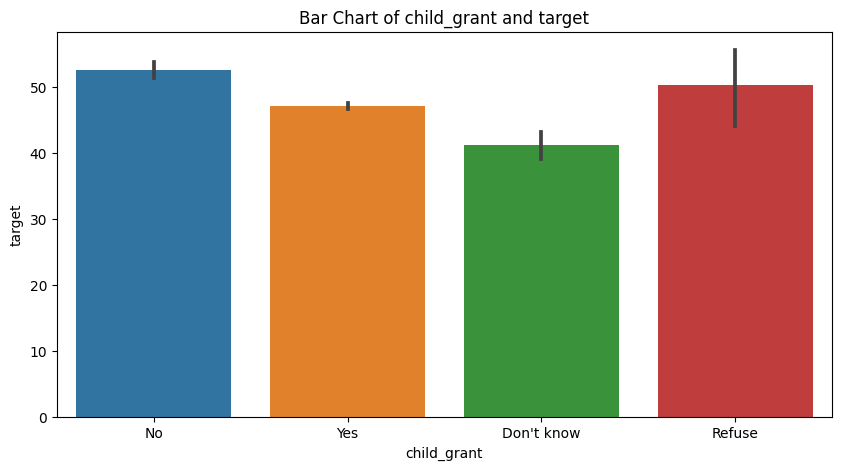

In [25]:
barchart(Train['child_grant'],Train['target'])

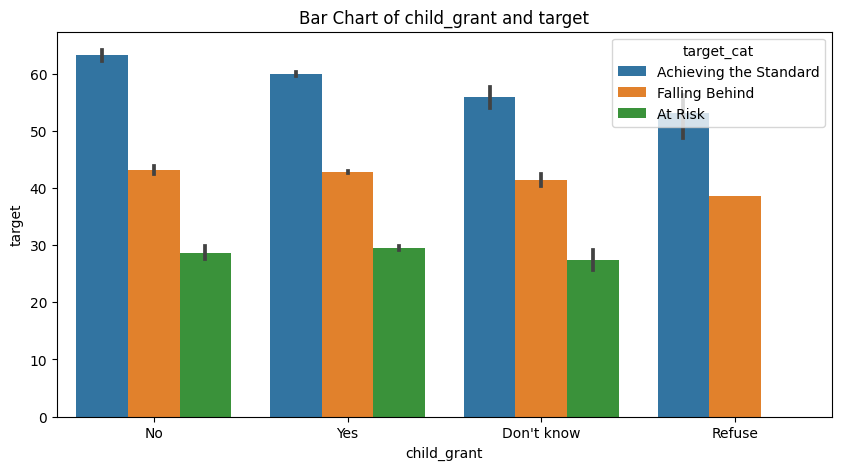

In [26]:
stack_barchart(Train['child_grant'],Train['target'],hue=Train['target_cat'])

In [28]:
#Children whose primary caretaker refused the Child Support Grant have no child At Risk
#Children whose primary caretaker refused the Child Support Grant have more children achieving the standard

In [29]:
Train['child_grant'].value_counts()

Yes           4515
No             764
Don't know     168
Refuse           5
Name: child_grant, dtype: int64

In [30]:
Train[Train['child_grant']=='Yes']['target_cat'].value_counts()/len(Train[Train['child_grant']=='Yes'])

Achieving the Standard    0.450498
Falling Behind            0.273090
At Risk                   0.267331
Name: target_cat, dtype: float64

In [31]:
Train[Train['child_grant']=='No']['target_cat'].value_counts()/len(Train[Train['child_grant']=='No'])

Achieving the Standard    0.608639
At Risk                   0.205497
Falling Behind            0.174084
Name: target_cat, dtype: float64

In [32]:
Train[Train['child_grant']=="Don't know"]['target_cat'].value_counts()/len(Train[Train['child_grant']=="Don't know"])

Falling Behind            0.345238
At Risk                   0.339286
Achieving the Standard    0.315476
Name: target_cat, dtype: float64

In [ ]:
""" Child Support Grant: 'No' - Majority of those who responded 'No' for the Child Support Grant are achieving the standard, 
which may indicate that they do not rely on the grant for financial assistance and are meeting the standard of living without it. 
A smaller percentage are at risk or falling behind, which could suggest that they may not require the grant due to their current financial situation.

Child Support Grant: 'Yes' - Majority of those who responded 'Yes' for the Child Support Grant are achieving the standard, 
which may indicate that they rely on the grant for financial assistance and are able to meet the standard of living with its support. 
A significant percentage are falling behind, which could suggest that the grant may not be sufficient to lift them out of poverty entirely.

Child Support Grant: 'Don't Know' - Those who responded 'Don't Know' for the Child Support Grant are relatively smaller in number compared to 'No' and 'Yes'. 
Majority of them are falling behind, which could suggest that they may not have adequate knowledge or information about the grant, 
its eligibility criteria, or how to apply for it, resulting in uncertainty about their eligibility status."""
pass

###child age

In [64]:
Train['child_age'].isnull().sum()/len(Train)

0.0

In [65]:
Train[['child_age','target']]

,child_age,target
0,59.000000,51.500000
1,60.163933,55.869999
2,69.000000,47.520000
3,53.000000,58.599998
4,57.000000,76.599998
...,...,...
8580,55.000000,23.469999
8581,55.000000,45.639999
8582,56.000000,53.290001
8583,57.000000,56.330002


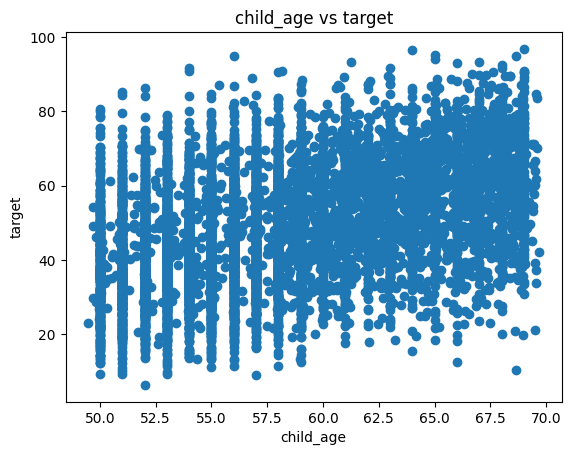

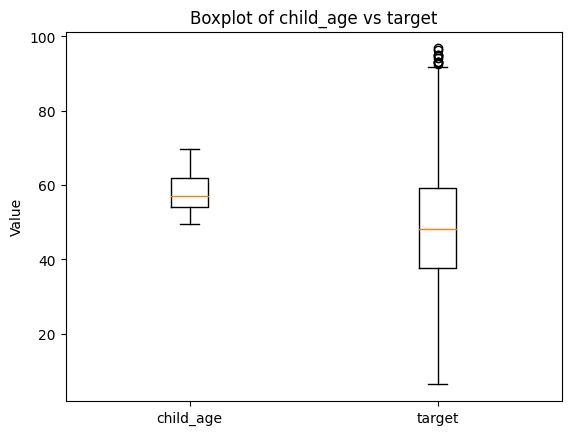

In [66]:
scatterplot(Train['child_age'],Train['target'])
boxplot(Train[['child_age','target']])

#Child age doesn't seem to be correlated to the target, maybe not alone

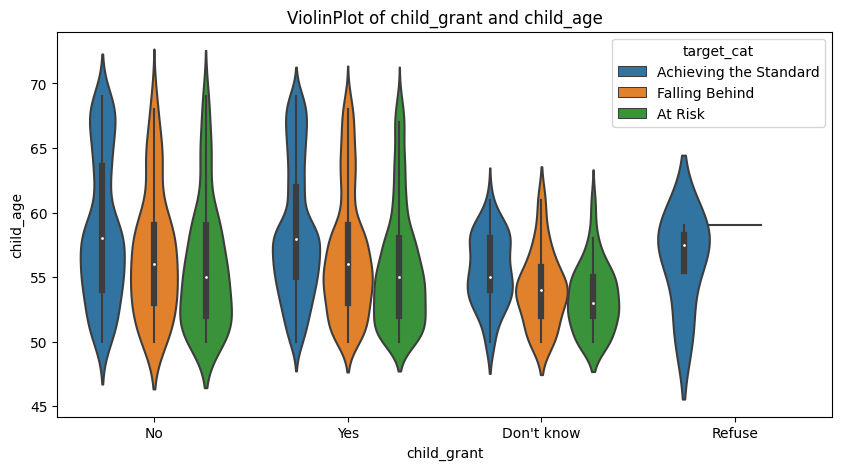

In [67]:
violinplot(x=Train['child_grant'],y=Train['child_age'],hue=Train['target_cat'])

In [69]:
Data['age_bin'] = pd.qcut(Data['child_age'],5,labels=False)
Train['age_bin'] = pd.qcut(Train['child_age'],5,labels=False)

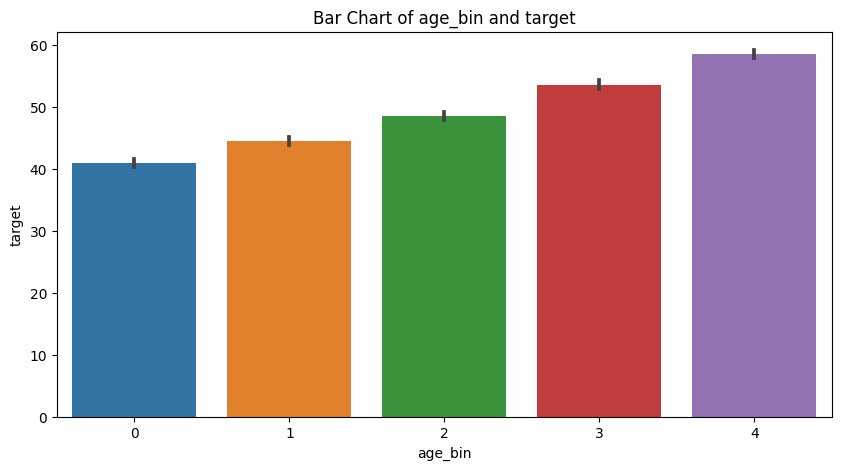

In [70]:
barchart(Train['age_bin'],Train['target'])

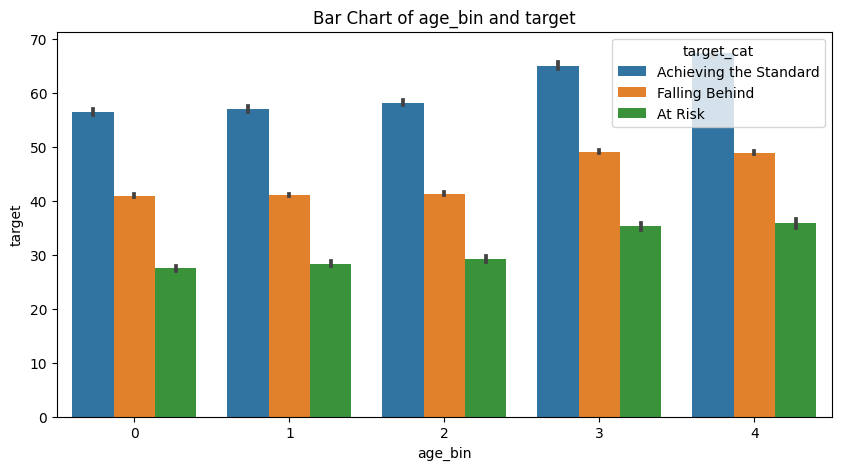

In [71]:
stack_barchart(Train['age_bin'],Train['target'],hue=Train['target_cat'])

In [72]:
Age0 = Train[Train['age_bin']==0]
Age1 = Train[Train['age_bin']==1]
Age2 = Train[Train['age_bin']==2]
Age3 = Train[Train['age_bin']==3]
Age4 = Train[Train['age_bin']==4]

print(f""" Age0 \n{Age0['target_cat'].value_counts()/len(Age0)}\n Age1 \n{Age1['target_cat'].value_counts()/len(Age1)}
      \n Age2 \n{Age2['target_cat'].value_counts()/len(Age2)}\n Age3 \n{Age3['target_cat'].value_counts()/len(Age3)}
      \n Age4 \n{Age4['target_cat'].value_counts()/len(Age4)}""")

 Age0 
At Risk                   0.381999
Achieving the Standard    0.329147
Falling Behind            0.284668
Name: target_cat, dtype: float64
 Age1 
Achieving the Standard    0.434162
Falling Behind            0.288736
At Risk                   0.277102
Name: target_cat, dtype: float64
      
 Age2 
Achieving the Standard    0.563927
Falling Behind            0.246005
At Risk                   0.189498
Name: target_cat, dtype: float64
 Age3 
Achieving the Standard    0.433460
Falling Behind            0.258555
At Risk                   0.201521
Name: target_cat, dtype: float64
      
 Age4 
Achieving the Standard    0.610723
Falling Behind            0.219697
At Risk                   0.150932
Name: target_cat, dtype: float64


In [48]:
"""These insights provide information on the distribution of target categories (i.e., "Achieving the Standard", "Falling Behind", "At Risk") among different age groups (i.e., age bins). 
It suggests that the proportion of children in each target category varies across different age groups, with the proportion of children 
categorized as "Achieving the Standard" generally increasing with age, while the proportion of children categorized as "At Risk" 
generally decreasing with age."""
pass

###child enrollment

In [73]:
Train.filter(like='enrolment')

,child_enrolment_date,child_months_enrolment
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,2020-01-15,20.0
4,2021-10-13,0.0
...,...,...
8580,2021-01-12,9.0
8581,2019-01-15,32.0
8582,2018-01-07,45.0
8583,2021-01-15,9.0


In [74]:
Train.filter(like='enrolment').isnull().sum()/len(Train)

child_enrolment_date      0.6947
child_months_enrolment    0.6947
dtype: float64

In [75]:
Train.filter(like='date')
#It seem child_enrolment_date + child_months_enrolment gives the day the child's ELOM was taken (child_date)

,child_date,child_enrolment_date,pqa_date,pra_date,pri_date,obs_date
0,2022-02-03,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-11,NaN,NaN,NaN,NaN,NaN
3,2021-10-13,2020-01-15,NaN,NaN,NaN,NaN
4,2021-10-13,2021-10-13,2021-10-29,2021-10-29,2021-10-29,2021-10-29
...,...,...,...,...,...,...
8580,2021-11-10,2021-01-12,2021-10-19,2021-10-19,2021-11-10,2021-10-19
8581,2021-10-12,2019-01-15,2021-10-12,2021-10-12,2021-10-12,2021-10-12
8582,2021-11-02,2018-01-07,2021-10-06,2021-10-06,2021-10-06,2021-10-06
8583,2021-11-05,2021-01-15,NaN,NaN,NaN,NaN


In [76]:
Train.filter(like='date').isnull().sum()/len(Train)

child_date              0.212114
child_enrolment_date    0.694700
pqa_date                0.810017
pra_date                0.809668
pri_date                0.810367
obs_date                0.809319
dtype: float64

In [77]:
vard[Train.filter(like='date').columns]
#What do the dates mean? and how are they related?

Variable Name,child_date,child_enrolment_date,pqa_date,pra_date,pri_date,obs_date
Variable Label,ELOM date,Date enrolled in ELP,Date,Date,Date,Date
Answer Label,Open ended,Open ended,Open ended,Open ended,Open ended,Open ended


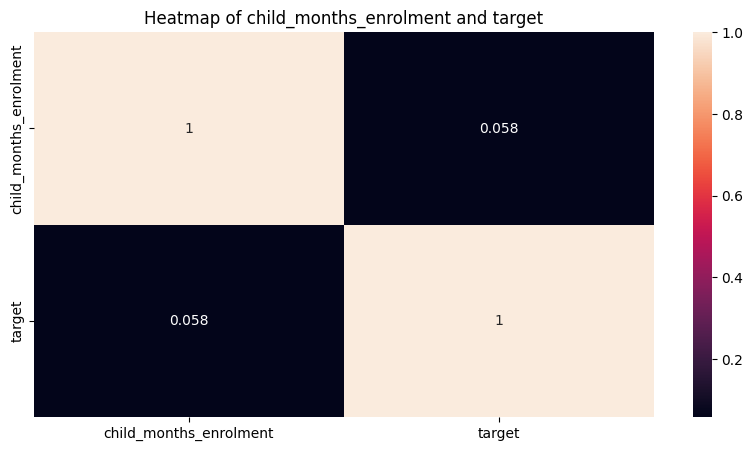

In [78]:
heatmap(Train[['child_months_enrolment','target']])

In [79]:
Train.corr()['child_months_enrolment'].sort_values(ascending=False)[:10]

child_months_enrolment       1.000000
count_practitioners_age_1    0.191992
count_register_year_2019     0.166057
count_register_year_2018     0.136209
id_enumerator                0.122746
count_register_year_2020     0.122652
pri_expense_food             0.116351
count_practitioners_age_0    0.109439
count_practitioners_age_3    0.089108
obs_classrooms               0.087340
Name: child_months_enrolment, dtype: float64

In [81]:
Train[['count_practitioners_age_1','count_register_year_2019', 'count_register_year_2018', 'id_enumerator',
      'count_register_year_2020', 'pri_expense_food','count_practitioners_age_0', 'count_practitioners_age_3','obs_classrooms']].isnull().sum()/len(Train)

count_practitioners_age_1    0.810367
count_register_year_2019     0.459755
count_register_year_2018     0.461153
id_enumerator                0.165754
count_register_year_2020     0.461619
pri_expense_food             0.811415
count_practitioners_age_0    0.810367
count_practitioners_age_3    0.810367
obs_classrooms               0.419336
dtype: float64

In [ ]:
#We are missing about 69% of the Child Enrolment Dates? Should we drop the columns?
#There doesn't seem to be an accurate way of replacing the missing dates
#Dropping all columns with missing values up to the 80th percentile
#There doesn't seem to be a positive correlation with months enrolment with other features, CHECK BACK LATER

###child_years_in_programme

In [82]:
Train['child_years_in_programme'].isnull().sum()/len(Train)

0.08223645894001165

In [84]:
Train['child_years_in_programme'].value_counts()

1st year in the programme    4369
2nd year in programme        1917
3rd year in programme        1485
Do Not Know                   108
Name: child_years_in_programme, dtype: int64

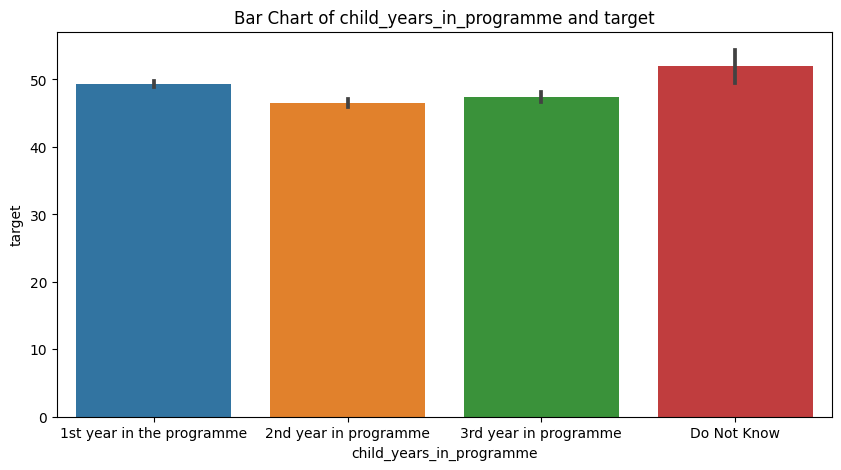

In [85]:
barchart(Train['child_years_in_programme'], Train['target'],10,5)

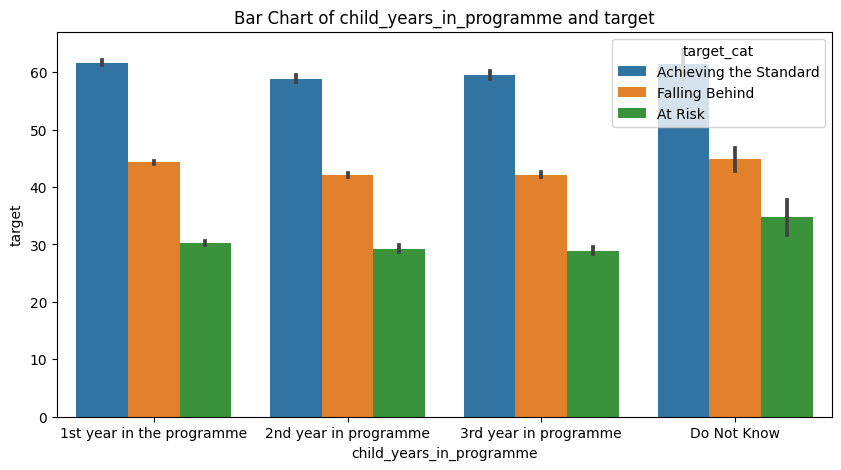

In [87]:
stack_barchart(Train['child_years_in_programme'],Train['target'],hue=Train['target_cat'],length=10,width=5)
#The third year seems to have the most uneven distribution, it has the smallest distribution of the classes of child_grant
#The second years seems to have the most even distribution

In [91]:
first = Train[Train['child_years_in_programme']=='1st year in the programme']
second = Train[Train['child_years_in_programme']=='2nd year in programme']
third = Train[Train['child_years_in_programme']=='3rd year in programme']
dnk = Train[Train['child_years_in_programme']=='Do Not Know']

print(f"""FIRST \n{first['target_cat'].value_counts()/len(first)}\nSECOND \n{second['target_cat'].value_counts()/len(second)}
      \nTHIRD \n{third['target_cat'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['target_cat'].value_counts()/len(dnk)}\n""")

FIRST 
Achieving the Standard    0.474708
Falling Behind            0.255207
At Risk                   0.242847
Name: target_cat, dtype: float64
 SECOND 
Achieving the Standard    0.451226
Falling Behind            0.272300
At Risk                   0.259259
Name: target_cat, dtype: float64
      
 THIRD 
Achieving the Standard    0.480135
Falling Behind            0.267340
At Risk                   0.243098
Name: target_cat, dtype: float64
 DON'T KNOW 
Achieving the Standard    0.462963
Falling Behind            0.212963
At Risk                   0.194444
Name: target_cat, dtype: float64



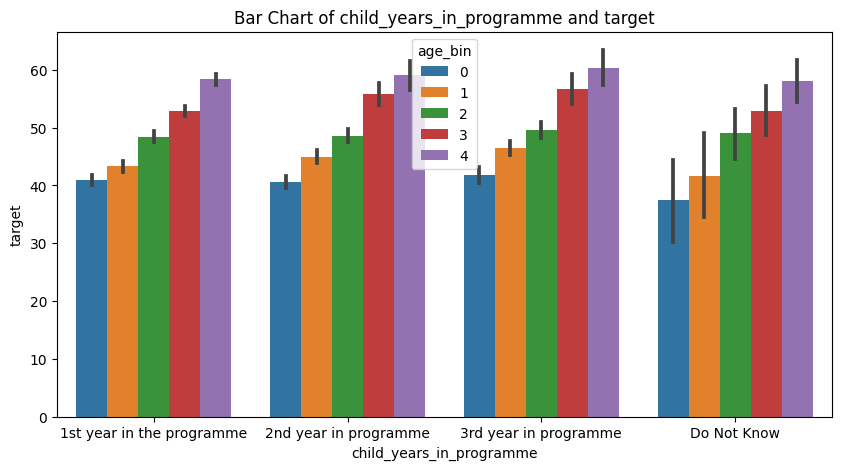

In [89]:
stack_barchart(Train['child_years_in_programme'],Train['target'],hue=Train['age_bin'],length=10,width=5)
#The children seem to be evenly distributed by age groups in the program years

In [93]:
first = Train[Train['child_years_in_programme']=='1st year in the programme']
second = Train[Train['child_years_in_programme']=='2nd year in programme']
third = Train[Train['child_years_in_programme']=='3rd year in programme']
dnk = Train[Train['child_years_in_programme']=='Do Not Know']

print(f"""FIRST \n{first['age_bin'].value_counts()/len(first)}\nSECOND \n{second['age_bin'].value_counts()/len(second)}
      \nTHIRD \n{third['age_bin'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['age_bin'].value_counts()/len(dnk)}\n""")

FIRST 
4    0.245136
0    0.193179
3    0.189746
2    0.187686
1    0.184253
Name: age_bin, dtype: float64
SECOND 
1    0.302556
0    0.290037
2    0.249348
3    0.099113
4    0.058946
Name: age_bin, dtype: float64
      
THIRD 
0    0.309764
1    0.306397
2    0.251852
3    0.078788
4    0.053199
Name: age_bin, dtype: float64
DON'T KNOW 
4    0.379630
3    0.259259
2    0.203704
0    0.083333
1    0.074074
Name: age_bin, dtype: float64



In [97]:
"""Age may impact program participation: The distribution of age groups may impact the number of years children spend in the programme. 
For example, children in age bin 0 (likely younger children) have higher proportions in the first and third years of the programme, 
while children in age bin 1 (slightly older children) have a higher proportion in the second year of the programme. 
This suggests that age may impact the duration of participation in the programme, with younger children potentially spending more time 
in the programme compared to older children."""
pass

###child_height

#Baseline Score

In [ ]:
def Baseline_Pred(model, X, y, test, scaler=None, verbose=False, predictions=True):
  fold = KFold(n_splits=5)
  test_preds = []
  oof_f1 = []
  for train_index, test_index in fold.split(X, y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=verbose)
    preds=model.predict(X_test)
    if predictions:
      test_pred = model.predict(test[X.columns])
      test_preds.append(test_pred)
    print(f"RMSE {mean_squared_error(y_test,preds,squared=False)}")
    oof_f1.append(mean_squared_error(y_test,preds,squared=False))

  print(f"Average_RMSE {sum(oof_f1)/5}")
  if predictions: 
    return test_preds, model
  return model

###Numerical Columns

In [ ]:
# num_cols = list(set(Test.select_dtypes('number')).intersection(Train.select_dtypes('number')))
num_cols = Train.select_dtypes('number').columns
num_train = Train[num_cols]
#num_test = Test[num_cols]

In [ ]:
missing_train_cols= plot_missing_cols(num_train, threshold=0.8, plot=False)
#missing_test_cols = plot_missing_cols(num_test, threshold=0.8, plot=False)
num_Train = num_train.drop(missing_train_cols,axis=1)
#num_Test = num_test.drop(missing_test_cols,axis=1)

In [ ]:
model_cbc = CatBoostRegressor(eval_metric='RMSE')

In [ ]:
num_Train.drop(['target'],axis=1,inplace=True)

In [ ]:
cbc_model = Baseline_Pred(model_cbc, num_Train, Train['target'], Test, verbose=False, predictions=False)

RMSE 9.904369984539441
RMSE 10.026474013770711
RMSE 10.007749172689108
RMSE 9.948819393791988
RMSE 10.116683731934891
Average_RMSE 10.000819259345228


###Categorical Columns

In [ ]:

cat_cols = Train.select_dtypes(include=['object']).columns


In [ ]:
le = LabelEncoder()

In [ ]:
test_cat_cols = Test.select_dtypes('object').columns

In [ ]:
cat_train = Train[cat_cols]
cat_test = Test[test_cat_cols]
missing_cols_train = plot_missing_cols(cat_train,threshold=0.8,plot=False)
missing_cols_test = plot_missing_cols(cat_test, threshold=0.8,plot=False)

In [ ]:
cat_Train = cat_train.drop(missing_cols_train,axis=1)
cat_Test = cat_test.drop(missing_cols_test,axis=1)

In [ ]:
for col in cat_Train.columns:
  cat_Train[col] = le.fit_transform(cat_Train[col])

In [ ]:
for col in cat_Test.columns:
  cat_Test[col] = le.fit_transform(cat_Test[col])

In [ ]:
cat_Train.drop(['child_id'],axis=1,inplace=True)
cat_Test.drop(['child_id'],axis=1,inplace=True)

In [ ]:
model_cbc = CatBoostRegressor(eval_metric='RMSE')

In [ ]:
cbc_preds, cbc_model = Baseline_Pred(model_cbc, cat_Train, Train['target'], cat_Test)

Learning rate set to 0.068909
0:	learn: 14.8490521	test: 14.9501283	best: 14.9501283 (0)	total: 14.2ms	remaining: 14.2s
200:	learn: 9.6851307	test: 10.8059703	best: 10.8059703 (200)	total: 2.2s	remaining: 8.75s
400:	learn: 8.5918430	test: 10.5717527	best: 10.5717527 (400)	total: 6.59s	remaining: 9.85s
600:	learn: 7.8813659	test: 10.4825866	best: 10.4825866 (600)	total: 8.51s	remaining: 5.65s
800:	learn: 7.3504625	test: 10.4260275	best: 10.4236185 (793)	total: 10.4s	remaining: 2.59s
999:	learn: 6.9070716	test: 10.3981200	best: 10.3970409 (953)	total: 12.4s	remaining: 0us

bestTest = 10.39704089
bestIteration = 953

Shrink model to first 954 iterations.
RMSE 10.397040890663636
Learning rate set to 0.068909
0:	learn: 14.8672276	test: 14.8676553	best: 14.8676553 (0)	total: 15.5ms	remaining: 15.5s
200:	learn: 9.6293003	test: 10.8097779	best: 10.8097779 (200)	total: 2.05s	remaining: 8.14s
400:	learn: 8.5092754	test: 10.5692738	best: 10.5692738 (400)	total: 5.35s	remaining: 8s
600:	learn: 7.7

##Submission

In [ ]:
explainer = shap.Explainer(cbc_model)

In [ ]:
# Compute the SHAP values for your test dataset
shap_values = explainer(num_Test)

In [ ]:
xd = num_Test.copy()
xd[num_Test.columns] = shap_values.values

In [ ]:
top_cols = xd.apply(lambda x: x.nlargest(15).index.tolist(), axis=1)

In [ ]:
feature_cols = Sub.filter(like='feature').columns

In [ ]:
xdc = pd.DataFrame(columns=feature_cols)
for i, cols in enumerate(top_cols):
  xdc.loc[i] = cols

In [ ]:
Sub['target'] = sum(cbc_preds)/5

In [ ]:
Sub[feature_cols] = xdc[feature_cols]

In [ ]:
Sub.to_csv('/content/Baseline_Only_Numerical_Columns_above_0.8threshold_CatBoost_Sub.csv',index=False)